In [1]:
import numpy as np
import pandas as pd
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go
from scipy import linalg
init_notebook_mode(connected=True)

In [2]:
N = 10
D = 3
X = np.zeros((N,D))
X[:,0] = 1
X[:5,1]=1
X[5:,2] = 1
### Try to sove
Y = np.array([0]*5 + [1]*5)
try:
    linalg.solve(np.matmul(X.T,X),np.matmul(X.T,Y))
except Exception as e:
    print(e)

Matrix is singular.


In [3]:
w = np.random.randn(D)/np.sqrt(D)
costs = []
λ = 0.001
for i in range(1000):
    Ŷ = np.matmul(X,w)  
    delta = Ŷ - Y
    w = w - λ*np.matmul(X.T,delta)
    mse = delta.dot(delta) / N
    costs.append(mse)
print(w)

[-0.00429294  0.00870075  0.99988452]


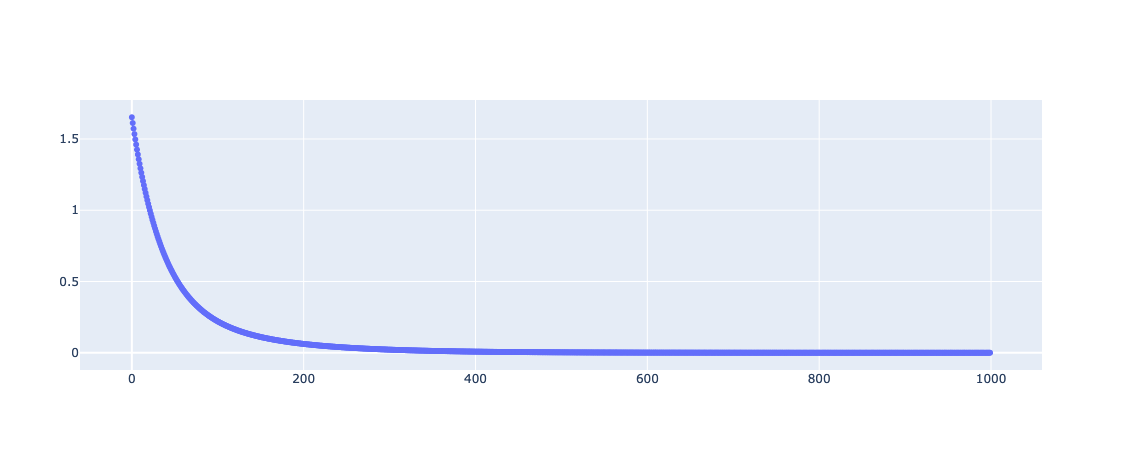

In [4]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0,len(costs)),y=costs,mode ='markers'))
fig.show()

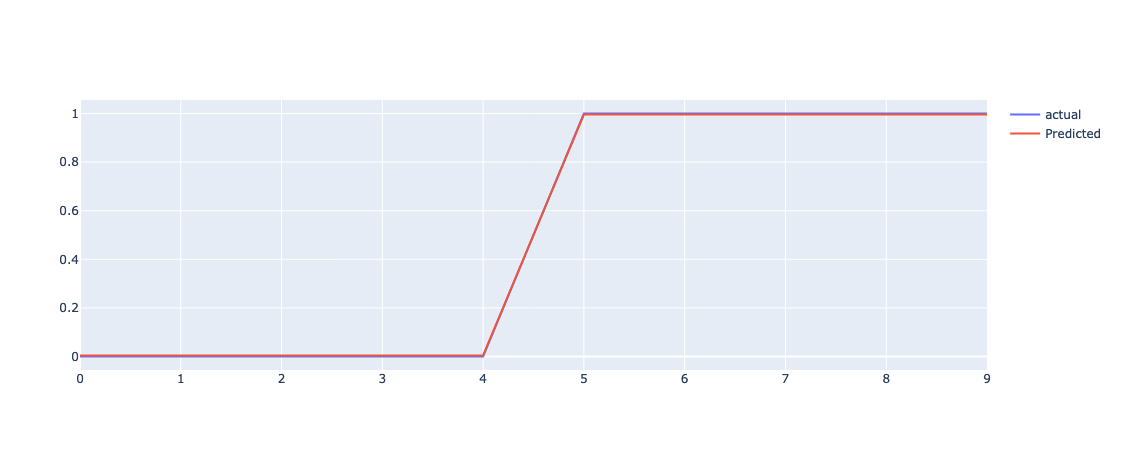

In [5]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0,len(Y)),y=Y,mode ='lines',name = 'actual'))
fig.add_trace(go.Scatter(x=np.arange(0,len(Y)),y=Ŷ,mode ='lines',name = 'Predicted'))
fig.show()